In [1]:
from cbir_helpers import gen_descriptors, match_images
from file_processing import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
import importlib
import cbir_helpers
importlib.reload(cbir_helpers)

<module 'cbir_helpers' from '/srv/app/cbir_helpers.py'>

In [50]:
def distinct(seq):
    # distinct elements in list preserving order
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x.split('/')[0] in seen or seen_add(x.split('/')[0]))]

In [90]:
def get_top_n_dists(d, n=3):
    correct_firsts = []
    wrong_match_dists = []
    for c_f, v in d.items():
        s = sorted(v, key=v.get)
        distinct_s = distinct(s)
        correct_firsts.append(v[distinct_s[0]])
        wrong_match_dists.append([v[x] for x in distinct_s[1:n]])
    return correct_firsts, wrong_match_dists

In [91]:
correct_firsts, wrong_match_dists = get_top_n_dists(d)

In [93]:
len(correct_firsts)

363

In [94]:
len(wrong_match_dists)

363

In [98]:
any([98.0, 133.0])>100

False

In [100]:
any(i>137 for i in [98.0, 133.0])

False

In [101]:
[i for i in wrong_match_dists if any(j>137 for j in i)]

[[120.0, 139.0],
 [114.0, 139.0],
 [117.0, 140.0],
 [143.0, 143.0],
 [126.0, 161.0],
 [142.0, 146.0],
 [151.0, 153.0],
 [167.0, 168.0],
 [177.0, 182.0],
 [128.0, 157.0],
 [159.0, 164.0],
 [129.0, 156.0],
 [152.0, 155.0],
 [163.0, 164.0],
 [169.0, 171.0],
 [129.0, 146.0],
 [136.0, 149.0],
 [138.0, 169.0],
 [148.0, 160.0],
 [125.0, 157.0],
 [144.0, 167.0],
 [158.0, 176.0],
 [126.0, 149.0],
 [175.0, 175.0],
 [163.0, 182.0],
 [103.0, 173.0],
 [163.0, 174.0],
 [180.0, 181.0],
 [162.0, 169.0],
 [172.0, 172.0],
 [162.0, 167.0],
 [171.0, 172.0],
 [175.0, 182.0],
 [156.0, 170.0],
 [163.0, 177.0],
 [163.0, 178.0],
 [157.0, 159.0],
 [144.0, 150.0],
 [150.0, 152.0],
 [154.0, 162.0],
 [146.0, 147.0],
 [154.0, 154.0],
 [156.0, 157.0],
 [165.0, 165.0],
 [140.0, 152.0],
 [159.0, 160.0],
 [169.0, 172.0],
 [145.0, 178.0],
 [170.0, 174.0],
 [148.0, 152.0],
 [126.0, 148.0],
 [164.0, 171.0],
 [155.0, 171.0],
 [151.0, 158.0],
 [126.0, 139.0],
 [136.0, 145.0],
 [147.0, 148.0],
 [135.0, 139.0],
 [155.0, 156.0

In [95]:
wrong_match_dists

[[98.0, 133.0],
 [129.0, 131.0],
 [120.0, 139.0],
 [97.0, 123.0],
 [97.0, 132.0],
 [110.0, 134.0],
 [114.0, 139.0],
 [117.0, 140.0],
 [103.0, 137.0],
 [143.0, 143.0],
 [124.0, 125.0],
 [126.0, 161.0],
 [142.0, 146.0],
 [151.0, 153.0],
 [167.0, 168.0],
 [177.0, 182.0],
 [128.0, 157.0],
 [159.0, 164.0],
 [129.0, 156.0],
 [152.0, 155.0],
 [163.0, 164.0],
 [169.0, 171.0],
 [129.0, 146.0],
 [136.0, 149.0],
 [138.0, 169.0],
 [148.0, 160.0],
 [125.0, 157.0],
 [144.0, 167.0],
 [158.0, 176.0],
 [126.0, 149.0],
 [175.0, 175.0],
 [163.0, 182.0],
 [103.0, 173.0],
 [163.0, 174.0],
 [180.0, 181.0],
 [162.0, 169.0],
 [172.0, 172.0],
 [162.0, 167.0],
 [171.0, 172.0],
 [175.0, 182.0],
 [156.0, 170.0],
 [163.0, 177.0],
 [163.0, 178.0],
 [157.0, 159.0],
 [144.0, 150.0],
 [150.0, 152.0],
 [154.0, 162.0],
 [146.0, 147.0],
 [154.0, 154.0],
 [156.0, 157.0],
 [165.0, 165.0],
 [140.0, 152.0],
 [159.0, 160.0],
 [126.0, 128.0],
 [169.0, 172.0],
 [145.0, 178.0],
 [170.0, 174.0],
 [148.0, 152.0],
 [126.0, 148.0],


In [116]:
def analyse_wrong_threshold(correct, wrong, prod=False, d=None, all_invalid_dists=None):
    data = {}
    for i in range(50, 230, 10):
        perc_correct_missed = len([d for d in correct if d>i])/len(correct)
        perc_wrong_admitted = len([d for d in wrong if d<i])/len(wrong)
        data[str(i)] = [perc_correct_missed, perc_wrong_admitted]
        columns = ['perc_correct_missed','perc_wrong_admitted']
        if all_invalid_dists is not None:
            perc_invalid_admitted = len([d for d in all_invalid_dists if d<i])/len(all_invalid_dists)
            data[str(i)].append(perc_invalid_admitted)
            columns.append('perc_invalid_admitted')
    
    data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
    display(data_df.plot())
    
    data = {}
    for i in range(50, 160, 10):
        count_correct_missed = len([d for d in correct if d>i])
        count_wrong_admitted = len([d for d in wrong if d<i])
        data[str(i)] = [count_correct_missed, count_wrong_admitted]
        columns = ['count_correct_missed', 'count_wrong_admitted']
        if all_invalid_dists is not None:
            count_invalid_admitted = len([d for d in all_invalid_dists if d<i])
            data[str(i)].append(count_invalid_admitted)
            columns.append('count_invalid_admitted')
    data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
    display(data_df.plot())
    
    # how many images will have a wrong match?
    if prod:
        data = {}
        correct_firsts, wrong_match_dists = get_top_n_dists(d)  # they're the same length
        for i in range(50, 230, 10):
            perc_correct_first_missed = len([d for d in correct_firsts if d>i])/len(correct_firsts)
            perc_wrong_matches_admitted = len([j for j in wrong_match_dists if any(k<i for k in j)])/len(wrong_match_dists)
            data[str(i)] = [perc_correct_first_missed, perc_wrong_matches_admitted]
            columns = ['perc_correct_first_missed','perc_wrong_matches_admitted']
        data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
        display(data_df.plot())
        
        data = {}
        for i in range(75, 137, 5):
            count_correct_first_missed = len([d for d in correct_firsts if d>i])
            count_wrong_matches_admitted = len([j for j in wrong_match_dists if any(k<i for k in j)])
            data[str(i)] = [count_correct_first_missed, count_wrong_matches_admitted]
            columns = ['count_correct_first_missed','count_wrong_matches_admitted']
        data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
        display(data_df.plot())
        

In [4]:
dataset_path = 'data/categories_castle_cafe/categories_blurred_photos_removed_multiple_hold_imgs_small_with_invalid/'
DETECTOR_TYPE = 'orb'
NO_CATS = 47
NO_FEATURES = 450
GREY = True

In [5]:
descriptors = cbir_helpers.gen_descriptors(dataset_path, DETECTOR_TYPE, NO_CATS, NO_FEATURES, GREY)

Time elapsed generating descriptors: 7.90776252746582


In [6]:
d = cbir_helpers.match_images('BF', descriptors)

Time elapsed matching all images: 192.8296217918396


In [19]:
correct, wrong, correct_top_3, wrong_top_3 = cbir_helpers.get_stats(d)

Max correct: 210.0
Min wrong: 82.0
Total number of images: 363
Number wrong: 22
Number wrong below threshold: 21
% wrong below max correct: 6.0%
% wrong overall: 6.0%
% wrong overall top 3: 5.0%


In [21]:
d_wo_invalid = {k:v for k,v in d.items() if k.split('/')[0] != str(47)}

In [31]:
correct, wrong, correct_top_3, wrong_top_3 = cbir_helpers.get_stats(d_wo_invalid)

Max correct: 137.0
Min wrong: 82.0
Total number of images: 320
Number wrong: 4
Number wrong below threshold: 1
% wrong below max correct: 0.0%
% wrong overall: 1.0%
% wrong overall top 3: 1.0%


In [32]:
min_dists = cbir_helpers.get_min_dists(d_wo_invalid)

In [33]:
correct, wrong = cbir_helpers.find_correct_wrong_dists(min_dists)

In [34]:
max(correct)

137.0

In [35]:
min(wrong)

82.0

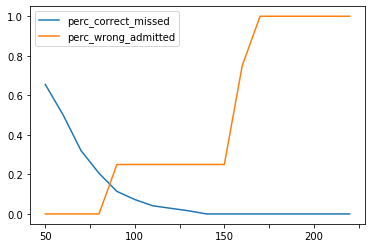

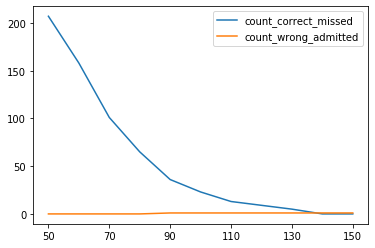

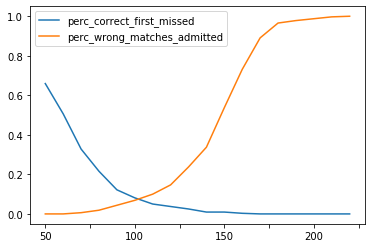

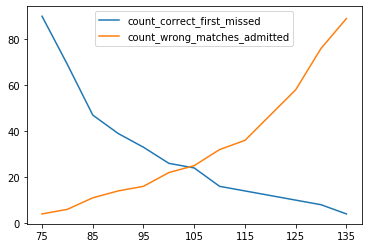

In [112]:
analyse_wrong_threshold(correct, wrong, True, d_wo_invalid)

Decided to still go for 137, as it will retain correct matches which is important for the user.

Data quality overall will be worse, but for now it would probably be sufficient. 

In [113]:
def invalid_images_stats(d):
    max_valids = []
    min_invalids = []
    all_invalid_dists = []
    for img, dists_d in d.items():
        if img.split('/')[0]!=str(47):  # we want to skip the bad images
            valid_dists = []
            invalid_dists = []
            for imgname, dist in dists_d.items():
                c = imgname.split('/')[0]
                if int(c)<47:
                    valid_dists.append(dist)
                else:
                    invalid_dists.append(dist)
                    all_invalid_dists.append(dist)
            max_valids.append(max(valid_dists))
            min_invalids.append(min(invalid_dists))
    return max_valids, min_invalids, all_invalid_dists

In [114]:
max_valids, min_invalids, all_invalid_dists = invalid_images_stats(d)

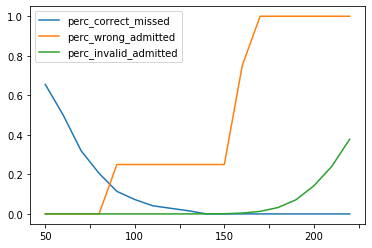

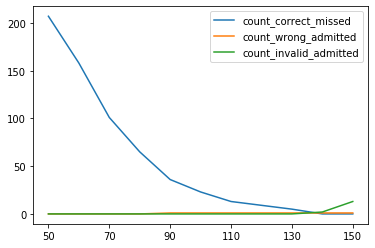

In [117]:
analyse_wrong_threshold(correct, wrong, all_invalid_dists=all_invalid_dists)

### Test set (Yonder)

The steps would be to match with Yonder and I would expect to see few incorrect matches under 137, and get all correct matches. 

However I know that images from Yonder are a bit different...

In [118]:
dataset_path = 'data/categories_yonder_cbir_small'
DETECTOR_TYPE = 'orb'
NO_CATS = 38
NO_FEATURES = 450
GREY = True

In [119]:
descriptors = cbir_helpers.gen_descriptors(dataset_path, DETECTOR_TYPE, NO_CATS, NO_FEATURES, GREY)

Time elapsed generating descriptors: 3.1919798851013184


In [120]:
len(list(descriptors.keys()))

137

In [121]:
d = cbir_helpers.match_images('BF', descriptors)

Time elapsed matching all images: 27.73279857635498


In [122]:
cbir_helpers.get_stats(d)

Max correct: 141.0
Min wrong: 51.0
Total number of images: 137
Number wrong: 21
Number wrong below threshold: 21
% wrong below max correct: 15.0%
% wrong overall: 15.0%
% wrong overall top 3: 3.0%


In [122]:
min_dists = cbir_helpers.get_min_dists(d)

In [123]:
correct, wrong = cbir_helpers.find_correct_wrong_dists(min_dists)

In [124]:
max(correct)

141.0

In [125]:
[c for c in correct if c > 137]

[141.0]

In [126]:
min(wrong)

51.0

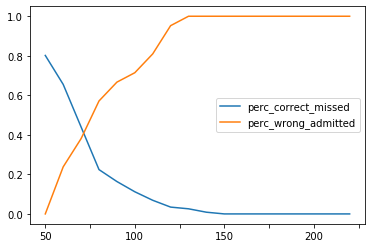

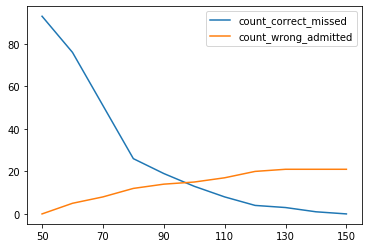

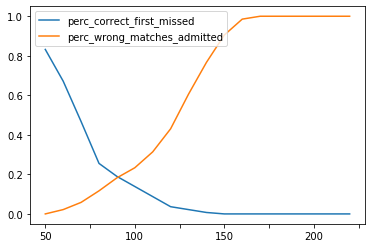

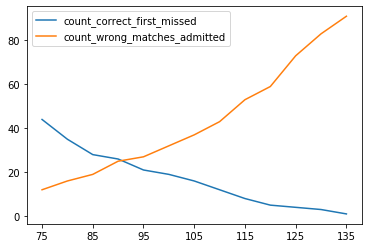

In [127]:
analyse_wrong_threshold(correct, wrong, prod=True, d=d)

For this dataset the threshold does not remove any wrong matches. But I know that those "wrong" matches are because that hold physically appeared in the another route's image. So you cant' blame it. 

On the correct side, only 1 correct match is prevented - not too bad.